# Join extrapolation grahps
In this notebook, we put together the three graphs for extrapolation

In [1]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [2]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_path = Path("../../data/regular/comparisons").resolve()
file = 'all_extrapol_values.csv'
df_all_inv_tc = pd.read_csv(os.path.join(data_path,file))

In [4]:
df_all_inv_tc = df_all_inv_tc.drop(index=0)

In [5]:
df_all_inv_tc

,p,Luijten_1997,Nagle-Bonner_1970,Doman_1981,Uzelac_1988,Glumac_1989,Glumac_1993,Monroe_1990,Pires_1995,Cannas_1995,...,sqrt_log_two,sqrt_log_three,hurwitz_zeta_2_params,sqrt_log_four,finite_hurw_3p,avg_hurwitz,power_law,power_law_referee,power_law_referee_nv-15,hurwitz_5p_nv-30
1,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.024508,NaN,NaN,0.024238,0.114034,0.000022,0.000116,0.024186
2,1.10,0.047616,NaN,0.047847,0.053308,0.050480,0.04635,0.047712,0.046942,0.052198,...,0.077578,0.123816,0.049997,0.133850,0.049664,0.049830,0.129638,0.000023,0.000286,0.049560
3,1.20,0.092234,0.092615,0.093399,0.094769,0.092251,0.09155,0.092670,0.089792,0.098232,...,0.158886,0.176079,0.103138,0.174723,0.104752,0.103939,0.164866,0.000025,0.000240,0.102219
4,1.25,0.114143,NaN,NaN,NaN,NaN,NaN,NaN,0.110576,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.30,0.136113,0.136956,0.138478,0.137552,0.136221,0.13585,0.137024,0.131424,0.145054,...,0.218396,0.222561,0.158983,0.216545,0.162066,0.160510,0.201064,0.000024,0.022454,0.157607
6,1.40,0.181151,0.182542,0.184081,0.182382,0.181455,0.18125,0.182083,0.175029,0.194932,...,0.270523,0.269099,0.215388,0.262336,0.219572,0.217460,0.242382,0.068481,0.102275,0.213803
7,1.50,0.229157,0.230737,0.230821,0.230468,0.229637,0.22950,0.229200,0.225079,0.247036,...,0.318850,0.315595,0.272854,0.308887,0.276180,0.274507,0.288786,0.163941,0.164458,0.271144
8,1.52,NaN,NaN,NaN,NaN,0.239820,NaN,NaN,0.236452,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.55,0.254772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.60,0.281800,0.283165,0.279092,0.283286,0.281928,0.28220,0.279564,0.289441,0.311915,...,0.364893,0.361294,0.330204,0.355642,0.330095,0.330149,0.340433,0.255837,0.243066,0.328581


Entramos
Entramos


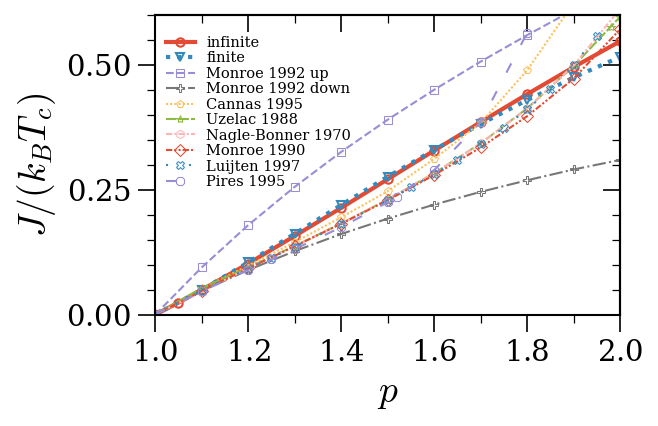

In [8]:
# Load the default style.
style.use("default")
# rcParams["text.usetex"] = False
markers = ["o","v","s","P","p","*","h","D","X","8"]
line_styles = ["solid","dotted","dashed","dashdot",
               (0,(1,1)),(0,(5,1)),(0,(3,1,1,1)),(0,(3,1,1,1,1,1)),(0,(1,10)),(0,(5,10)),(0,(3,10,1,10))]
labels = [
#           "\sqrt{-\ln(a_1+a_2x+a_3x^2)}",
#           "a_1 \sqrt{(x+a_2)^2 + a_3}",
#           "a_1 (1/series(n_v,p,z=1,a=a_2))",
#           "\sqrt{-\ln(a_1+a_2x)}",
#           "a_1\sqrt{-\ln(a_2+a_3x)}",
#           "sqrt-log-4",
#           "a_1 + a_2 (1/n_v) + a3 (1/n_v)^{a_4}",
#          "Our results",
#          "infinite*"
         "infinite",
         "finite",
         "Monroe 1992 up",
         "Monroe 1992 down",
         "Cannas 1995",
         "Uzelac 1988",
         "Nagle-Bonner 1970",
         "Monroe 1990",
         "Luijten 1997",
         "Pires 1995"
]

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
# fig1: Figure = pyplot.figure(figsize=(12*(4/9), 12), dpi=150)
# fig1: Figure = pyplot.figure(figsize=(4, 4*(2/3)), dpi=150)
    
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

COLUMNS = [
#            'sqrt_log',
#            'hiperbolic',
#            'zeta_function',
#            'sqrt_log_two',
#            'sqrt_log_three',
#            'sqrt_log_four',
#            'linear_power_law',
#          "avg_hurwitz",
#          "hurwitz_zeta_2_params",
         "hurwitz_5p_nv-30",
         "finite_hurw_3p",
         "Monroe_1992_up",
         "Monroe_1992_down",
         "Cannas_1995",
         "Uzelac_1988",
         "Nagle-Bonner_1970",
         "Monroe_1990",
         "Luijten_1997",
         "Pires_1995"
]
    
for index, COLUMN in enumerate(COLUMNS):
    df_all_inv_tc_no_nan = df_all_inv_tc[["p",COLUMN]].dropna()
    #get data
    x_data = df_all_inv_tc_no_nan["p"].values
    
    y_data = df_all_inv_tc_no_nan[COLUMN].values
    
    # add zero val
    x_data = np.insert(x_data,0,1)
    y_data = np.insert(y_data,0,0)
    
    if COLUMN == 'hurwitz_zeta_2_params' or COLUMN == "finite_hurw_3p" or COLUMN == 'avg_hurwitz' or COLUMN == "hurwitz_5p_nv-30":
        print('Entramos')
        ax.plot(x_data, y_data, marker=markers[index],
               color='C'+str(index),
               mfc='none',
               markeredgewidth=1,
               lw=2,
               linestyle=line_styles[index],
               label = r"{}".format(labels[index])
           )
    else:
        ax.plot(x_data, y_data, 
                marker=markers[index],
#                 markeredgecolor='black',
                markeredgewidth=0.5,
                color='C'+str(index),
                mfc='none',
                lw=1,
                linestyle=line_styles[index],
                label = r"{}".format(labels[index])
        )


# Set major ticks for x axis
major_xticks = np.arange(1, 2, 0.2)

# Set minor ticks for x axis
minor_xticks = np.arange(1, 2, 0.1)

# Set major ticks for y axis
major_yticks = np.arange(0, 1, 0.25)

# Set minor ticks for y axis
minor_yticks = np.arange(0, 1, 0.05)

# ticks configuration
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

# labels configurations
ax.xaxis.label.set_size(18)
ax.set_xlabel(r"$p$")

ax.yaxis.label.set_size(18)
ax.set_ylabel(r"$J/(k_BT_c)$")
# ax.axvline(x=1,linestyle='--')

ax.set_ylim(0,0.6)
ax.set_xlim(1, 2)

ax.legend(
          loc =(0.01,0.40),
          fontsize = 7,
          labelspacing = 0.1,
          frameon=False
)

# ticks for the top axes
ax.tick_params(which='both',top=False,right=False)
ax.tick_params(which='minor',size=4)
ax.tick_params(which='major',size=8)
ax2 = ax.secondary_xaxis('top')
ax2.tick_params(which='both',direction='in',labeltop=False)
ax2.tick_params(which='minor',size=4)
ax2.tick_params(which='major',size=8)
ax2.set_ticks(major_xticks)
ax2.set_ticks(minor_xticks, minor=True)

# ticks for the right axes
ax3 = ax.secondary_yaxis('right')
ax3.tick_params(which='both',direction='in',labelright=False)
ax3.tick_params(which='minor',size=4)
ax3.tick_params(which='major',size=8)
ax3.set_ticks(major_yticks)
ax3.set_ticks(minor_yticks,minor=True)

#save plot
# plt.savefig('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\venv\\graphs\\comparisons\\all_inv_Tc_extrapol_literature_rev2.pdf')
plt.savefig('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\graphs\\comparisons\\all_inv_Tc_extrapol_literature_rev2.eps',format='eps')

pyplot.draw()
pyplot.show()
